# NCAR EdEc Bootcamp, Lesson 2

Quick notebook on clustering

## Python Imports

In [1]:
import pandas as pd
import numpy as np

# Dataset
from palmerpenguins import load_penguins

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn

In [2]:
print('scikit-learn version:', sklearn.__version__)

scikit-learn version: 1.3.0


## Dataset Loading

In [3]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
dfredf = df.drop(['year'], axis=1)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


We can also get a count of all the nans in the dataset:

In [5]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [6]:
df = df.dropna() # this drops all rows with a nan in it
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


## Let's scale the dataset:

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
float_columns = df.select_dtypes(include=['float64', 'float32'])
float_column_names = float_columns.columns.tolist()
float_column_names

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_scaled = scaler.fit_transform(float_columns, y=None)
np.shape(std_scaled)

(333, 4)

# Clustering (or unsupervised ML)

Unsupervised machine learning is a subset of AI where algorithms analyze and find patterns in data without predefined labels or categories. It involves clustering, where data points are grouped based on similarities, and dimensionality reduction, which simplifies complex data while retaining essential information. Unlike supervised learning, there are no target outputs to guide the learning process, making it useful for exploring data and uncovering hidden structures. Unsupervised ML has applications in fields like data exploration, anomaly detection, and recommendation systems, contributing to a deeper understanding of data without explicit guidance.

#### Top 5 Clusterings Algo's

- K-Means: K-Means is a popular centroid-based clustering algorithm. It partitions data points into 'K' clusters, where each cluster is represented by the mean of the data points in that cluster. It aims to minimize the distance between data points and their respective cluster centroids.

- Hierarchical Clustering: Hierarchical clustering creates a tree of clusters by successively merging or splitting clusters based on a chosen similarity metric. It results in a dendrogram that can be cut at different levels to form clusters of varying sizes.

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN is a density-based algorithm that groups together data points that are close to each other in terms of a distance metric. It is particularly useful for discovering clusters of varying shapes and sizes, and it can identify noise points as well.

- Gaussian Mixture Model (GMM): GMM is a probabilistic model that represents data as a mixture of several Gaussian distributions. It assumes that data points are generated from a mixture of multiple Gaussian distributions and assigns probabilities of belonging to each distribution, allowing for soft assignments.

- Mean Shift: Mean Shift is a non-parametric algorithm that involves iteratively shifting a windowed kernel to the mode (peak) of the data distribution. It converges to areas of high data density, effectively identifying cluster centroids without requiring prior knowledge of the number of clusters.

We will cover two of these below, but scikit-learn can do all of these, with a nice overview [here](https://scikit-learn.org/stable/modules/clustering.html).

## KMeans

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

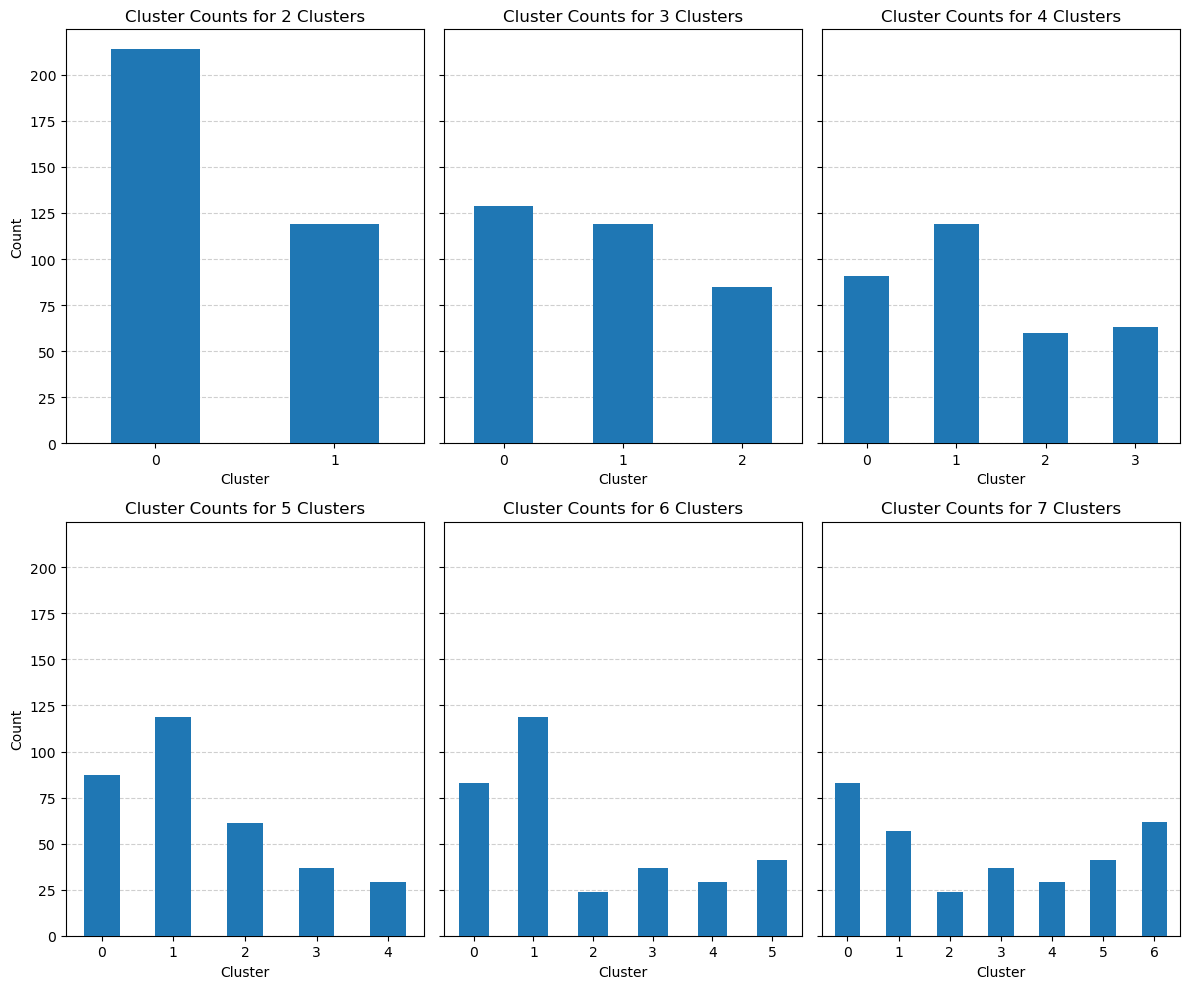

In [11]:
# Select the features you want to use for clustering
features = float_column_names

# Store inertia values for different numbers of clusters
inertia_values = []

# Store silhouette scores for different numbers of clusters
silhouette_scores = []

range_n_clusters = range(2, 8)

# Create subplots grid
n_rows = 2  # Number of rows in the subplot grid
n_cols = 3  # Number of columns in the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10), sharey=True)
axes = axes.flatten()  # Flatten the 2D array of subplots for easier indexing

# Set the same y-axis limits for all subplots
y_limit = None  # Adjust this to your desired y-axis limit

# Make empty dataframe
df_empty = pd.DataFrame()

# Loop through the cluster range
for idx, n_clusters in enumerate(range_n_clusters):
    # Initialize the KMeans algorithm with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

    # Fit the algorithm to the data
    kmeans.fit(std_scaled)

    # Create column name for the cluster labels
    cluster_column_name = f'cluster{n_clusters}'

    # Add cluster labels to the DataFrame
    df_empty[cluster_column_name] = kmeans.labels_

    # Count the number of data points in each cluster
    cluster_counts = df_empty[cluster_column_name].value_counts().sort_index()

    # Create a bar chart for cluster counts in the appropriate subplot
    ax = axes[idx]

    # Add horizontal grid lines behind the bars
    ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=0)

    cluster_counts.plot(kind='bar', ax=ax, zorder=3)  # Set higher zorder to bring bars in front
    ax.set_title(f'Cluster Counts for {n_clusters} Clusters')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_xticks(cluster_counts.index)
    ax.set_xticklabels(cluster_counts.index, rotation=0)

    # Add horizontal grid lines behind the bars
    ax.yaxis.grid(True, linestyle='--', alpha=0.6, zorder=0)

    # Set y-axis limit if specified
    if y_limit is not None:
        ax.set_ylim(0, y_limit)

    # Store inertia value
    inertia_values.append(kmeans.inertia_)

    # Calculate the silhouette score and store it
    silhouette_scores.append(silhouette_score(df[features], kmeans.labels_))

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

In [12]:
# Create a cross-tabulation table
cross_tab = pd.crosstab( df_empty['cluster3'], df['species'])

print(cross_tab)

species   Adelie  Chinstrap  Gentoo
cluster3                           
0            119          5       0
1              6          0     110
2             21         52       9


In [13]:
# Notice anything about the clustering results in reguards to species?

To pick the best number of clusters, you can use inerita and silhouette score.

1. Inertia:
Inertia, also known as within-cluster sum of squares, measures how compact the clusters are. It calculates the sum of squared distances between each data point and its assigned cluster's centroid. Lower inertia indicates that the data points within a cluster are closer to each other and therefore the clusters are more compact.

2. Silhouette Score:
Silhouette score measures how similar each data point is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

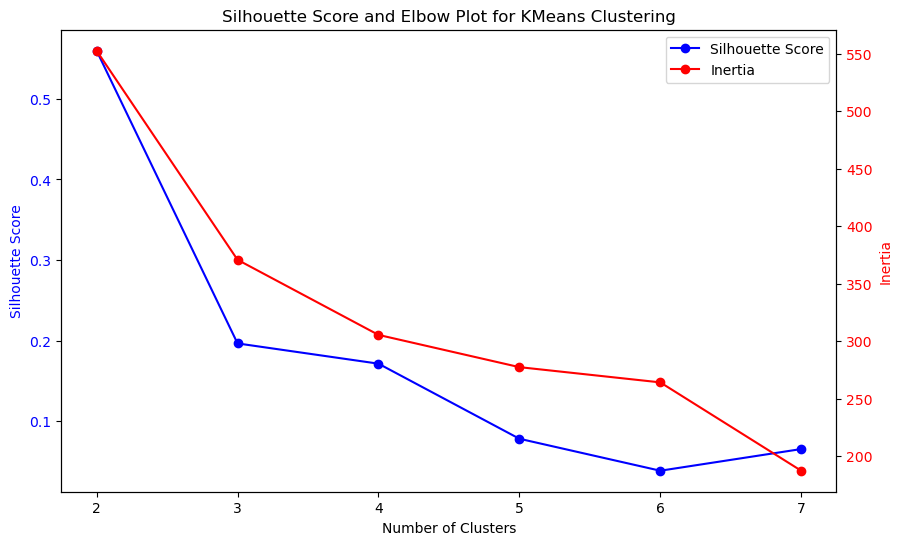

In [14]:
# Create a figure and the first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot silhouette score on the first y-axis
ax1.plot(range(2, 8), silhouette_scores, marker='o', color='b', label='Silhouette Score')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Score', color='b')
ax1.set_xticks(range(2, 8))
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Silhouette Score and Elbow Plot for KMeans Clustering')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot inertia on the second y-axis
ax2.plot(range(2, 8), inertia_values, marker='o', color='r', label='Inertia')
ax2.set_ylabel('Inertia', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Show legends for both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the combined plot
plt.show()

### Some reasons to use KMEeans:

**Simplicity and Speed**: K-means is relatively simple to understand and implement, making it an excellent choice for quickly gaining insights from unlabeled data. Its algorithmic simplicity contributes to its speed, allowing it to handle large datasets efficiently.

**Scalability**: K-means can handle large datasets with ease, making it suitable for tasks involving a substantial amount of data points. Its time complexity is linear with the number of data points and the number of clusters, which makes it scalable to larger datasets.

**Interpretability**: The output of K-means is intuitive – each data point is assigned to a cluster, and the cluster centers (centroids) are representative of the characteristics of the data within each cluster. This interpretability aids in understanding the inherent structure of the data.

**Versatility**: K-means can be applied to various domains and data types, including numerical, categorical, and mixed data. It's also commonly used in image compression, recommendation systems, and customer segmentation, showcasing its versatility.

**Initial Seed Control**: K-means allows for control over initial cluster center initialization, which can impact the final clustering results. This helps mitigate the sensitivity to initializations and improve the stability of the clustering.

## Mean Shift Clustering

In [15]:
from sklearn.cluster import MeanShift

In [16]:
# Define a list of bandwidth values to try
bandwidths = [0.5, .75, 1.0, 1.25, 1.4, 1.5, 2.0]

How is this different from KMeans?

In [17]:
for bandwidth in bandwidths:
    # Create the Mean Shift clustering model
    ms = MeanShift(bandwidth=bandwidth)

    # Fit the model to the data
    ms.fit(std_scaled)

    # Get the number of clusters identified by the algorithm
    n_clusters = len(np.unique(ms.labels_))

    print(f"Bandwidth: {bandwidth:.2f} - Number of Clusters: {n_clusters}")

Bandwidth: 0.50 - Number of Clusters: 72
Bandwidth: 0.75 - Number of Clusters: 15
Bandwidth: 1.00 - Number of Clusters: 4
Bandwidth: 1.25 - Number of Clusters: 4
Bandwidth: 1.40 - Number of Clusters: 3
Bandwidth: 1.50 - Number of Clusters: 2
Bandwidth: 2.00 - Number of Clusters: 2


In [18]:
clustering = MeanShift(bandwidth=1.4).fit(std_scaled)

Feel free to adjust the bandwidth! 

In [19]:
# Create a cross-tabulation table
cross_tab = pd.crosstab( clustering.labels_, df['species'])

print(cross_tab)

species  Adelie  Chinstrap  Gentoo
row_0                             
0           146         34       0
1             0          1     119
2             0         33       0


Some Reasons why you might use mean shift over KMeans:

- Number of Clusters: K-means requires the number of clusters to be specified in advance, whereas Mean Shift does not require this parameter. Mean Shift determines the number of clusters automatically based on the data distribution, making it more suitable when the number of clusters is not known beforehand.

- Cluster Shape and Size: K-means assumes that clusters are spherical and equally sized. Mean Shift, on the other hand, can discover clusters of various shapes and sizes. It is particularly effective for identifying clusters with irregular shapes, non-uniform densities, and varying sizes.

- Density Estimation: Mean Shift is essentially a density-based clustering algorithm. It identifies areas of high data density and converges towards the modes of the density function. This makes it robust to noise and capable of capturing clusters of varying densities, whereas K-means treats all clusters as having equal densities.

- Data Distribution: Mean Shift is suitable for data with complex and non-linear distributions. It can identify clusters even when the data points are not well-separated or exhibit overlap, which can be a challenge for K-means.

- Initialization Sensitivity: K-means is sensitive to the initial placement of centroids, which can lead to different results with different initializations. Mean Shift is less affected by initialization, as it doesn't rely on centroids. It starts with a random set of points and iteratively shifts them towards areas of higher density until convergence.

- Parameter Tuning: Mean Shift has fewer hyperparameters to tune compared to K-means. This can simplify the process of finding optimal clustering solutions.

- Algorithm Intuition: Mean Shift can be thought of as a "hill-climbing" algorithm that finds modes in the data distribution. This intuitive approach can be appealing and easy to understand, especially in scenarios where you want to find the "peaks" in your data.

In [20]:
# your code here!

the end